In [12]:
import torch
import torchvision
from torchvision import transforms, datasets

In [8]:
train = datasets.MNIST("",train=True,download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train=False,download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

In [9]:
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [12]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

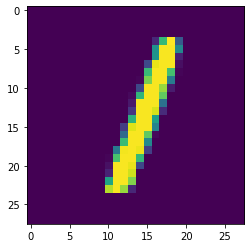

In [15]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))

In [10]:
# VID 3
import torch.nn as nn
import torch.nn.functional as F

In [44]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        #28*28=784 fc:fullyconnected
        self.fc1 = nn.Linear(784,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
    
    # will define how the data will flow through the layers
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x,dim=1)
        # dim=1 means across output layer
        
        
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [45]:
X = torch.rand((28,28))
X = X.view(1,28*28)
print(X.shape)

torch.Size([1, 784])


In [46]:
output = net(X)

In [47]:
output 

tensor([[-2.3314, -2.3523, -2.2792, -2.4054, -2.2567, -2.2879, -2.2043, -2.2742,
         -2.3472, -2.3018]], grad_fn=<LogSoftmaxBackward>)

In [51]:
print(net.parameters())

<generator object Module.parameters at 0x12ff90350>


In [52]:
# VID 4
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)

EPOCHS =3
# ONE HOT VECTOR : One value is on
for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featureset and labels
        X, y = data
        net.zero_grad()
        output =  net(X.view(-1,28*28))
        # nll_loss used because our output is a scalar.
        loss = F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.2227, grad_fn=<NllLossBackward>)
tensor(0.0363, grad_fn=<NllLossBackward>)
tensor(0.0140, grad_fn=<NllLossBackward>)


In [53]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainset:
        X, y = data
        output =  net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1
print(round(correct/total,3))

0.976


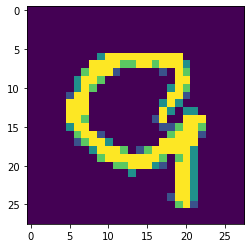

In [55]:
plt.imshow(X[0].view(28,28))
plt.show()

In [57]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(9, grad_fn=<NotImplemented>)


In [2]:
# VID 5 : CONV NET INTRO
# Recently cnn have been proved to be better than RNN in sequential tasks as well.
# takes 2d input ,convulation window is generally called a kernel
import os
import cv2
import numpy as np
from tqdm import tqdm

In [3]:
REBUILD_DATA = True

class DogsVSCats():
    IMG_SIZE=50
    CATS="/Users/eshankarora/Downloads/kagglecatsanddogs_3367a/PetImages/Cat"
    DOGS="/Users/eshankarora/Downloads/kagglecatsanddogs_3367a/PetImages/Dog"
    LABELS = {CATS : 0 , DOGS : 1}
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label,f)
                    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    # color does not add another dimension to data, it adds another channel (??)
                    img = cv2.resize(img, (self.IMG_SIZE,self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                
                    if label == self.CATS:
                        self.catcount+=1
                    elif label == self.DOGS:
                        self.dogcount+=1
                except Exception as e:
                    pass
                    # print(str(e))
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print(self.catcount,self.dogcount)

if REBUILD_DATA:
    dogvcats = DogsVSCats()
    dogvcats.make_training_data()

/Users/eshankarora/Downloads/kagglecatsanddogs_3367a/PetImages/Cat


  0%|          | 13/12501 [00:00<01:42, 122.28it/s]

/Users/eshankarora/Downloads/kagglecatsanddogs_3367a/PetImages/Dog


100%|██████████| 12501/12501 [02:11<00:00, 94.77it/s] 


12476 12470


In [4]:
training_data = np.load("training_data.npy",allow_pickle=True)

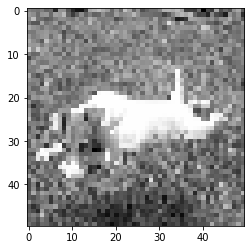

In [7]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0],cmap="gray")

In [8]:
print(training_data[1][1])

[0. 1.]


In [13]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,32,5)
        self.conv2 = nn.Conv2d(32,64,5)
        self.conv3 = nn.Conv2d(64,128,5)
        
        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)        
        
        self.fc1 = nn.Linear(self._to_linear,512)
        self.fc2 = nn.Linear(512,2)
        
    def convs(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)),(2,2))
        #print(x[0].shape)
        if self._to_linear is None :
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x
    
    def forward(self,x):
        x = self.convs(x)
        x = x.view(-1,self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x,dim=1)

net = Net()

In [15]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)
print(val_size)

2494


In [16]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]
print(len(train_X),len(test_X))

22452 2494


In [17]:
BATCH_SIZE = 100
EPOCHS = 3
# TRAIN
for epoch in range(EPOCHS):
    for i in tqdm(range(0,len(train_X),BATCH_SIZE)):
        #print(i,i+BATCH_SIZE)
        batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
        batch_y = train_y[i:i+BATCH_SIZE]
    
        net.zero_grad()
        outputs = net(batch_X)
        loss = loss_function(outputs,batch_y)
        loss.backward()
        optimizer.step()
    print(epoch, loss)
        

  0%|          | 0/225 [00:00<?, ?it/s]

0 tensor(0.2048, grad_fn=<MseLossBackward>)


  0%|          | 0/225 [00:00<?, ?it/s]

1 tensor(0.1758, grad_fn=<MseLossBackward>)


100%|██████████| 225/225 [01:54<00:00,  1.96it/s]

2 tensor(0.1677, grad_fn=<MseLossBackward>)


In [104]:
print(loss)

tensor(0.2493, grad_fn=<MseLossBackward>)


In [18]:
correct = 0
total = 0
#TEST
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1,1,50,50))[0]
        predicted_class = torch.argmax(net_out)
        if predicted_class == real_class:
            correct+=1
        total+=1
print(round(correct/total,3))

100%|██████████| 2494/2494 [00:07<00:00, 340.35it/s]

0.712


In [19]:
torch.cuda.is_available()

False

In [20]:
print("yolo")

yolo


In [21]:
def fwd_pass(X,y,train=False):
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [torch.argmax(i)==torch.argmax(j) for i,j in zip(outputs,y)]
    acc = matches.count(True)/len(matches)
    loss =loss_function(outputs,y)
    
    if train :
        loss.backward()
        optimizer.step()
    return acc , loss

In [23]:
def test(size=32):
    random_start = np.random.randint(len(test_X)-size)
    X,y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch.no_grad():
        val_acc,val_loss = fwd_pass(X.view(-1,1,50,50),y)
    return val_acc,val_loss

In [25]:
test(size=32)

(0.78125, tensor(0.1585))

In [30]:
import time

MODEL_NAME = f"model - {int(time.time())}"

net = Net()
optimizer = optim.Adam(net.parameters(),lr=0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def train():
    BATCH_SIZE = 30
    EPOCHS = 5
    with open("model.log","a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0,len(train_X),BATCH_SIZE)):
                batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
                batch_y = train_y[i:i+BATCH_SIZE]
                
                acc, loss = fwd_pass(batch_X,batch_y,train=True)
                if i%50 == 0 :
                    val_acc, val_loss = test(size=100)
                    f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc),2)},{round(float(loss),3)},{round(float(val_acc),2)},{round(float(val_loss),3)}\n")

train()

  0%|          | 0/749 [00:00<?, ?it/s]

model - 1593263584


100%|██████████| 749/749 [05:39<00:00,  2.21it/s]


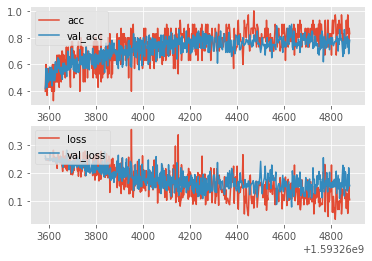

In [32]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

model_name = "model - 1593263584" # grab whichever model name you want here. We could also just reference the MODEL_NAME if you're in a notebook still.


def create_acc_loss_graph(model_name):
    contents = open("model.log", "r").read().split("\n")

    times = []
    accuracies = []
    losses = []

    val_accs = []
    val_losses = []

    for c in contents:
        if model_name in c:
            name, timestamp, acc, loss, val_acc, val_loss = c.split(",")

            times.append(float(timestamp))
            accuracies.append(float(acc))
            losses.append(float(loss))

            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))


    fig = plt.figure()

    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)


    ax1.plot(times, accuracies, label="acc")
    ax1.plot(times, val_accs, label="val_acc")
    ax1.legend(loc=2)
    ax2.plot(times,losses, label="loss")
    ax2.plot(times,val_losses, label="val_loss")
    ax2.legend(loc=2)
    plt.show()

create_acc_loss_graph(model_name)